In [19]:
import matplotlib.pyplot as plt
import cv2

from pathlib import Path
import ipywidgets as widgets
import tqdm
import imgaug.augmenters as iaa
import numpy as np
from skimage import exposure
from collections import defaultdict
from ipywidgets import interact
import imutils

In [5]:
negative_samples = list(Path("/data/Datasets/usg-kaggle/train/0").rglob("*radial*"))
positive_samples = list(Path("/data/Datasets/usg-kaggle/train/1").rglob("*radial*"))

len(negative_samples), len(positive_samples)

(1333, 1418)

In [3]:
negative_list = widgets.IntSlider(
    min=0,
    max=len(negative_samples) - 1,
    value=0
)

denoising_wid = widgets.IntSlider(
    min=0,
    max=110,
    value=0
)
@interact(index=negative_list, denoising=denoising_wid)
def show_negative(index, denoising):
    path = negative_samples[index]
    img = cv2.imread(path.as_posix())[..., ::-1]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.fastNlMeansDenoising(img, h=denoising)
    plt.imshow(img, cmap="gray")

interactive(children=(IntSlider(value=0, description='index', max=1332), IntSlider(value=0, description='denoi…

In [4]:
positive_list = widgets.IntSlider(
    min=0,
    max=len(negative_samples) - 1,
    value=0
)
@interact(index=positive_list)
def show_negative(index):
    path = positive_samples[index]
    img = cv2.imread(path.as_posix())[..., ::-1]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = exposure.equalize_hist(img)
    plt.imshow(img, cmap="gray")

interactive(children=(IntSlider(value=0, description='index', max=1332), Output()), _dom_classes=('widget-inte…

In [5]:
widths, heights = [], []
total_counts = np.zeros((255,))
for p in tqdm.tqdm_notebook(positive_samples + negative_samples):
    an_img = cv2.imread(p.as_posix())
    widths.append(an_img.shape[1])
    heights.append(an_img.shape[0])
    hist = np.histogram(an_img, bins=np.arange(0, 256))
    total_counts += hist[0]

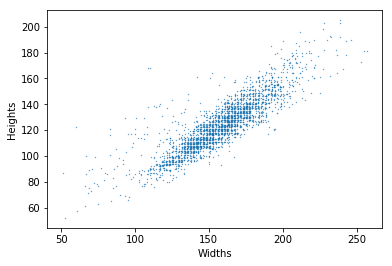

In [6]:
plt.scatter(widths, heights, s=0.1)
plt.ylabel("Heights")
plt.xlabel("Widths")
plt.grid(False)

<BarContainer object of 255 artists>

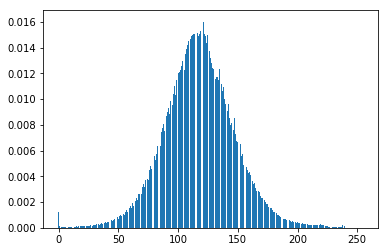

In [7]:
plt.bar(np.arange(0, 255), total_counts / total_counts.sum())

In [6]:
np.mean(widths), np.mean(heights)

NameError: name 'widths' is not defined

In [7]:
np.std(widths), np.std(heights)

NameError: name 'widths' is not defined

In [8]:
alpha = widgets.FloatSlider(
    value=0.0,
    min=0.0,
    max=10,
)
sigma = widgets.FloatSlider(
    value=0.0,
    min=0.0,
    max=10
)

positive_list = widgets.IntSlider(
    min=0,
    max=len(positive_samples) - 1,
    value=0
)

@interact(index=positive_list, alpha=alpha, sigma=sigma)
def show_elastic(index, alpha, sigma):
    path = positive_samples[index]
    img = cv2.imread(path.as_posix(), 0)
    
    kek = iaa.Sequential(
        [
            iaa.ElasticTransformation(alpha=alpha, sigma=sigma, mode="wrap"),
            iaa.Affine(
                rotate=30,
                mode="symmetric"
            )
        ]
    )
    
    img = kek.augment_image(img)
    plt.imshow(img, cmap="gray")

interactive(children=(IntSlider(value=0, description='index', max=1417), FloatSlider(value=0.0, description='a…

In [10]:
whole_negative_samples = list(Path("/data/Datasets/usg-kaggle/train/0").rglob("lower.png"))
whole_positive_samples = list(Path("/data/Datasets/usg-kaggle/train/1").rglob("lower.png"))

len(whole_negative_samples), len(whole_positive_samples)

(1333, 1418)

In [29]:
alpha = widgets.FloatSlider(
    value=25,
    min=0.0,
    max=30,
)
sigma = widgets.FloatSlider(
    value=10,
    min=0.0,
    max=30
)

positive_list = widgets.IntSlider(
    min=0,
    max=len(positive_samples) - 1,
    value=0
)

@interact(index=positive_list, alpha=alpha, sigma=sigma)
def show_elastic(index, alpha, sigma):
    path = positive_samples[index]
    img = cv2.imread(path.as_posix(), 0)
    
    kek = iaa.Sequential(
        [
            iaa.ElasticTransformation(alpha=alpha, sigma=sigma, mode="wrap"),
            iaa.Affine(
                rotate=-10,
                mode="symmetric"
            )
        ]
    )
    
    img = kek.augment_image(img)
    plt.imshow(img, cmap="gray")

interactive(children=(IntSlider(value=0, description='index', max=1417), FloatSlider(value=25.0, description='…

In [22]:
height, width = cv2.imread(whole_negative_samples[0].as_posix(), 0).shape
cuts_width = widgets.IntRangeSlider(
    value=(250, width - 250),
    min=0,
    max=width,
)

cuts_height = widgets.IntRangeSlider(
    value=(10, height - 10),
    min=0,
    max=height,
)


whole_positive_list = widgets.IntSlider(
    min=0,
    max=len(whole_positive_samples) - 1,
    value=0
)

@interact(index=whole_positive_list, cut_width=cuts_width, cut_height=cuts_height)
def show_elastic(index, cut_width, cut_height):
    path = whole_positive_samples[index]
    
    up, down = cut_height
    left, right = cut_width
    
    img = cv2.imread(path.as_posix(), 0)[up:down, left:right]
    img = imutils.resize(img, height=96)
    
#     plt.figure(figsize=(18, 8))
    plt.imshow(img, cmap="gray")

interactive(children=(IntSlider(value=0, description='index', max=1417), IntRangeSlider(value=(250, 800), desc…